In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [92]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [93]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [94]:
data.YearsExperience.unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [95]:
data.YearsExperience.value_counts()

4.0     2
3.2     2
9.6     1
6.8     1
2.0     1
3.0     1
4.5     1
6.0     1
9.0     1
9.5     1
10.5    1
5.9     1
8.7     1
3.7     1
4.1     1
5.1     1
2.2     1
7.1     1
8.2     1
7.9     1
2.9     1
1.3     1
10.3    1
3.9     1
1.1     1
5.3     1
4.9     1
1.5     1
Name: YearsExperience, dtype: int64

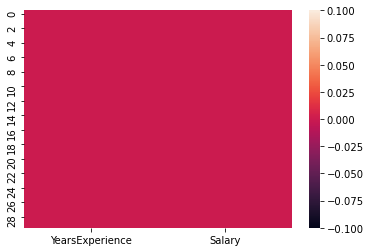

In [96]:
sns.heatmap(data.isnull())

In [97]:
datacor= data.corr()
datacor

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


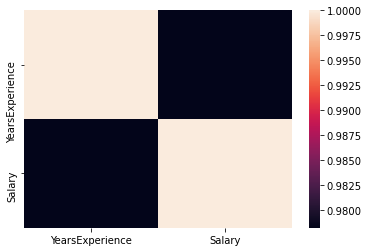

In [98]:
sns.heatmap(datacor)

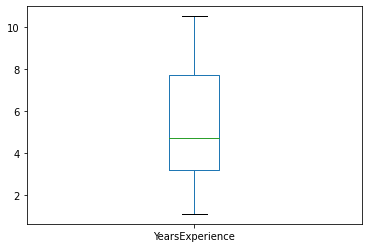

In [99]:
data['YearsExperience'].plot.box()

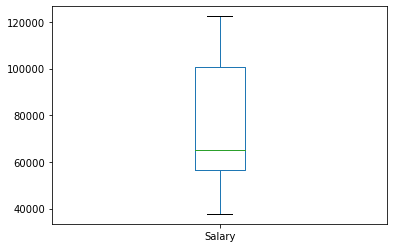

In [100]:
data['Salary'].plot.box()

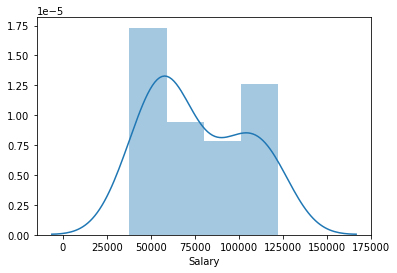

In [101]:
sns.distplot(data['Salary'])

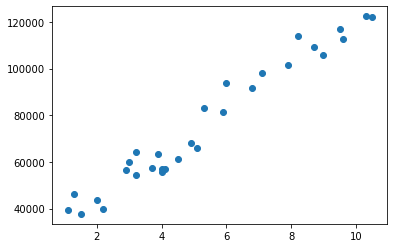

In [102]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.show()

In [103]:
x=data.iloc[:,:-1]

In [104]:
x.shape

(30, 1)

In [105]:
y=data.iloc[:,1]

In [106]:
y.shape

(30,)

In [107]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [109]:
lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [110]:
lg.coef_

array([9345.94244312])

In [111]:
lg.intercept_

26816.19224403119

In [112]:
lg.score(x_train,y_train)

0.9381900012894278

In [113]:
y_pred = lg.predict(x_test)

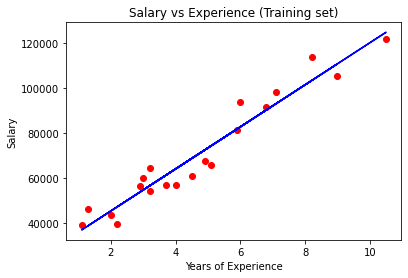

In [114]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lg.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


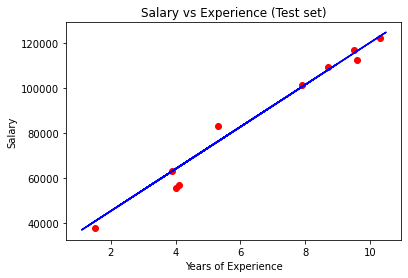

In [115]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lg.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [116]:
pred = lg.predict(x_test)
print('Predicted result price:',pred)
print('acual price',y_test)

Predicted result price: [ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]
acual price 2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
22    101302.0
Name: Salary, dtype: float64


In [117]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean spuared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 3426.4269374307123
Mean spuared error: 21026037.329511296
Root Mean Squared Error: 4585.4157204675885


In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is:",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9749154407708353
RMSE is :  4585.4157204675885


In [121]:
 import joblib
joblib.dump(lg,'lg_Salary.csv')

['lg_Salary.csv']